# Classification of UN General Assembly Speaches

Using scikit-learn.

In [10]:
import pandas as pd

import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk import word_tokenize
import nltk
nltk.download('punkt')

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.feature_selection import SelectKBest, chi2

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to /home/vscode/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [11]:
import sklearn
print(sklearn.__version__)

0.23.2


## Step 1 -  Data Preparation

In [12]:
df_raw = pd.read_csv("data/source/un-general-debates-blueprint.csv.gz")

SUBSET = ["BRA", "RUS", "IND", "CHN", "ZAF"]    # The BRICS - Brazil, Russian, India, China, South Africa
SUBSET = SUBSET + ["USA",  "GBR", "AUS", "CAN", "NZL"]  # The Five Eyes - USA, UK, Australia, Canada, New Zealand

df = df_raw[df_raw["country"].isin(SUBSET)][["country", "text"]].reset_index(drop=True)
print(df.shape)
df.head()

(439, 2)


,country,text
0,AUS,100.\t It is a pleasure for me to extend to y...
1,BRA,"1.\tMr. President, I should like, first of all..."
2,CAN,\nThe General Assembly is fortunate indeed to ...
3,GBR,"110.\t Mr. President, I should like first to s..."
4,IND,"40.\t Mr. President, I offer you our congratul..."


In [13]:
df.groupby("country").count().reset_index().sort_values(by="text", ascending=False)

,country,text
0,AUS,46
1,BRA,46
2,CAN,46
4,GBR,46
5,IND,46
6,NZL,46
8,USA,46
3,CHN,45
7,RUS,45
9,ZAF,27


In [14]:
df_X_train, df_X_test, df_y_train, df_y_test = train_test_split(df["text"], df["country"], test_size=0.25, random_state=123)

In [15]:
df_X_train.head()

204    May I begin \nby warmly congratulating you, Si...
0      100.\t  It is a pleasure for me to extend to y...
249    ﻿Let me begin by\ncongratulating Mr. Udovenko ...
151    Mr. President, I welcome you to your prestigio...
355    As we meet for the \nsixty-second session of t...
Name: text, dtype: object

## Step 2 - Machine Learning - Multiclass Classification

In [16]:
def classify(classifier, X_train,  X_test, y_train, y_test):
    classifier.fit(X_train, y_train)
    y_predicted = classifier.predict(X_test)
    plot_confusion_matrix(classifier, X_test, y_test)
    print(classification_report(y_test, y_predicted))
    return classifier
    

### 2.1 Experiment One - Plain Vanila

              precision    recall  f1-score   support

         AUS       1.00      0.09      0.17        11
         BRA       0.00      0.00      0.00        13
         CAN       0.06      1.00      0.11         6
         CHN       1.00      0.08      0.15        12
         GBR       0.00      0.00      0.00        10
         IND       0.00      0.00      0.00        14
         NZL       1.00      0.09      0.17        11
         RUS       0.00      0.00      0.00        16
         USA       0.00      0.00      0.00        12
         ZAF       0.00      0.00      0.00         5

    accuracy                           0.08       110
   macro avg       0.31      0.13      0.06       110
weighted avg       0.31      0.08      0.06       110



Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', MultinomialNB())])

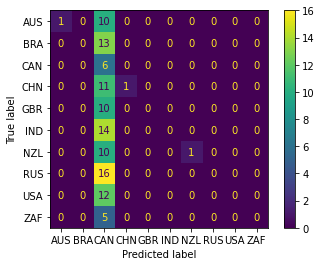

In [17]:
trial_1 = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', MultinomialNB()),
])
 
classify(trial_1, df_X_train, df_X_test, df_y_train, df_y_test)

### 2.2 Experiment Two - Remove Stopwords

              precision    recall  f1-score   support

         AUS       1.00      0.91      0.95        11
         BRA       1.00      1.00      1.00        13
         CAN       0.27      1.00      0.43         6
         CHN       1.00      1.00      1.00        12
         GBR       1.00      0.90      0.95        10
         IND       1.00      1.00      1.00        14
         NZL       1.00      1.00      1.00        11
         RUS       1.00      0.81      0.90        16
         USA       1.00      0.50      0.67        12
         ZAF       0.00      0.00      0.00         5

    accuracy                           0.85       110
   macro avg       0.83      0.81      0.79       110
weighted avg       0.91      0.85      0.86       110



Pipeline(steps=[('vectorizer', TfidfVectorizer(stop_words='english')),
                ('classifier', MultinomialNB())])

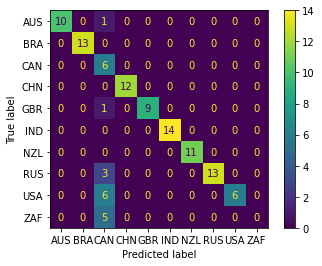

In [18]:
trial_2 = Pipeline([
    ('vectorizer', TfidfVectorizer(stop_words='english')),
    ('classifier', MultinomialNB()),
])
 
classify(trial_2, df_X_train, df_X_test, df_y_train, df_y_test)

### 2.3 Experiment Three - Adjust Alpha

              precision    recall  f1-score   support

         AUS       1.00      0.91      0.95        11
         BRA       1.00      1.00      1.00        13
         CAN       0.27      1.00      0.43         6
         CHN       1.00      1.00      1.00        12
         GBR       1.00      0.90      0.95        10
         IND       1.00      1.00      1.00        14
         NZL       1.00      1.00      1.00        11
         RUS       1.00      0.81      0.90        16
         USA       1.00      0.50      0.67        12
         ZAF       0.00      0.00      0.00         5

    accuracy                           0.85       110
   macro avg       0.83      0.81      0.79       110
weighted avg       0.91      0.85      0.86       110



Pipeline(steps=[('vectorizer', TfidfVectorizer(stop_words='english')),
                ('classifier', MultinomialNB())])

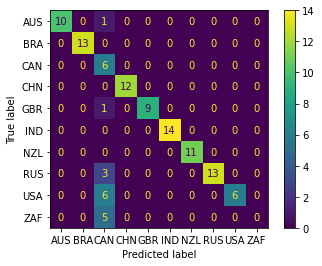

In [19]:
trial_3 = Pipeline([
    ('vectorizer', TfidfVectorizer(stop_words='english')),
    ('classifier', MultinomialNB(alpha=0.05)),
])
 
classify(trial_2, df_X_train, df_X_test, df_y_train, df_y_test)

### 2.4 Experiment Four - Minimum Document Frequency

              precision    recall  f1-score   support

         AUS       0.92      1.00      0.96        11
         BRA       1.00      1.00      1.00        13
         CAN       0.75      1.00      0.86         6
         CHN       1.00      1.00      1.00        12
         GBR       1.00      1.00      1.00        10
         IND       1.00      1.00      1.00        14
         NZL       1.00      1.00      1.00        11
         RUS       1.00      1.00      1.00        16
         USA       1.00      0.75      0.86        12
         ZAF       1.00      1.00      1.00         5

    accuracy                           0.97       110
   macro avg       0.97      0.97      0.97       110
weighted avg       0.98      0.97      0.97       110



Pipeline(steps=[('vectorizer', TfidfVectorizer(min_df=5, stop_words='english')),
                ('classifier', MultinomialNB(alpha=0.05))])

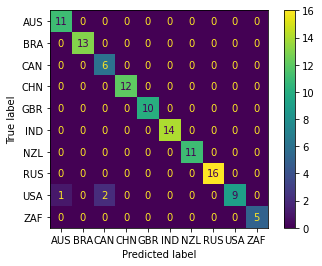

In [20]:
trial_4 = Pipeline([
    ('vectorizer', TfidfVectorizer(stop_words='english',min_df=5)),
    ('classifier', MultinomialNB(alpha=0.05)),
])
 
classify(trial_4,  df_X_train, df_X_test, df_y_train, df_y_test)

### 2.5 Experiment Five - Use Stemmer

              precision    recall  f1-score   support

         AUS       0.85      1.00      0.92        11
         BRA       1.00      1.00      1.00        13
         CAN       0.75      1.00      0.86         6
         CHN       1.00      0.92      0.96        12
         GBR       1.00      1.00      1.00        10
         IND       0.93      1.00      0.97        14
         NZL       1.00      0.91      0.95        11
         RUS       1.00      1.00      1.00        16
         USA       0.90      0.75      0.82        12
         ZAF       1.00      0.80      0.89         5

    accuracy                           0.95       110
   macro avg       0.94      0.94      0.94       110
weighted avg       0.95      0.95      0.95       110



Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                                 tokenizer=<function stemming_tokenizer at 0x7f2da41123a0>)),
                ('classifier', MultinomialNB(alpha=0.05))])

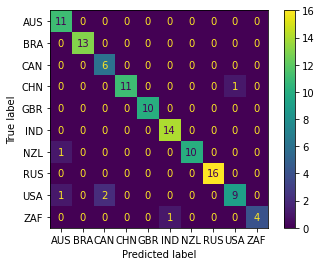

In [21]:
def stemming_tokenizer(text):
    return [PorterStemmer().stem(w) for w in word_tokenize(text)]
 
trial_5 = Pipeline([
    ('vectorizer', TfidfVectorizer(tokenizer=stemming_tokenizer,
                             stop_words=stopwords.words('english') + list(string.punctuation))),
    ('classifier', MultinomialNB(alpha=0.05)),
])
 
classify(trial_5,  df_X_train, df_X_test, df_y_train, df_y_test)

## Step 3 - Classification using PyCaret

In [22]:
from pycaret.classification import  *

tfidf = TfidfVectorizer(stop_words="english", min_df=10)

tfidf.fit(df_X_train)    # Fit with the train data
feature_names = tfidf.get_feature_names()

X_train_sparse = tfidf.transform(df_X_train)  

ch2 = SelectKBest(chi2, k=200)
X_train_chi2 = ch2.fit_transform(X_train_sparse, df_y_train)

#best_features = feature_names[feature_names[ch2.get_support(1)]]
df_X_train_vectorized =  pd.DataFrame(X_train_chi2.toarray(), index=df_X_train.index)
df_train = pd.concat([df_y_train.rename("COUNTRY"), df_X_train_vectorized], axis=1)
print(df_train.shape)

X_test_sparse = tfidf.transform(df_X_test)          # used the same vectorize to transform the test data
X_test_chi2 = ch2.transform(X_test_sparse)
df_X_test_vectorized =  pd.DataFrame(X_test_chi2.toarray(), index=df_X_test.index)
df_test = pd.concat([df_y_test.rename("COUNTRY"), df_X_test_vectorized], axis=1)
print(df_test.shape)

(329, 201)
(110, 201)


In [23]:
s = setup(data=df_train, target="COUNTRY", test_data=df_test, silent=True, fold=5, session_id=123)

,Description,Value
0,session_id,123
1,Target,COUNTRY
2,Target Type,Multiclass
3,Label Encoded,"AUS: 0, BRA: 1, CAN: 2, CHN: 3, GBR: 4, IND: 5, NZL: 6, RUS: 7, USA: 8, ZAF: 9"
4,Original Data,"(329, 201)"
5,Missing Values,False
6,Numeric Features,200
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [24]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.9879,0.0000,0.9886,0.9891,0.9876,0.9865,0.9867,0.0280
rf,Random Forest Classifier,0.9878,0.9998,0.9860,0.9897,0.9878,0.9864,0.9867,0.1680
et,Extra Trees Classifier,0.9878,0.9998,0.9874,0.9894,0.9868,0.9864,0.9868,0.1420
svm,SVM - Linear Kernel,0.9818,0.0000,0.9827,0.9849,0.9817,0.9797,0.9802,0.0160
lr,Logistic Regression,0.9726,0.9984,0.9654,0.9758,0.9712,0.9695,0.9700,0.7240
lightgbm,Light Gradient Boosting Machine,0.9635,0.9992,0.9648,0.9722,0.9624,0.9594,0.9605,0.2420
knn,K Neighbors Classifier,0.9605,0.9971,0.9549,0.9664,0.9604,0.9560,0.9567,0.0260
gbc,Gradient Boosting Classifier,0.9331,0.9974,0.9254,0.9486,0.9332,0.9255,0.9273,1.8240
lda,Linear Discriminant Analysis,0.9211,0.9865,0.9230,0.9274,0.9212,0.9121,0.9127,0.0380
dt,Decision Tree Classifier,0.8692,0.9281,0.8609,0.8962,0.8668,0.8545,0.8573,0.0160


In [25]:
predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.9909,0,0.9909,0.9916,0.9909,0.9898,0.9899


,0,1,2,3,4,5,6,7,8,9,...,192,193,194,195,196,197,198,199,COUNTRY,Label
0,0.000000,0.0,0.047484,0.004934,0.000000,0.008479,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.017318,0.0,0.000000,0.0,0.0,0.0,IND,IND
1,0.067818,0.0,0.000000,0.040347,0.034453,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.283231,0.0,0.034791,0.0,0.0,0.0,ZAF,ZAF
2,0.000000,0.0,0.019821,0.093709,0.064632,0.000000,0.0,0.015744,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,GBR,GBR
3,0.000000,0.0,0.010647,0.000000,0.000000,0.000000,0.0,0.000000,0.042397,0.0,...,0.036426,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,BRA,BRA
4,0.000000,0.0,0.020546,0.044834,0.019143,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,IND,IND
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.027960,0.0,0.0,0.0,RUS,RUS
106,0.000000,0.0,0.000000,0.058209,0.037280,0.016671,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,IND,IND
107,0.000000,0.0,0.000000,0.030979,0.019841,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,GBR,GBR
108,0.000000,0.0,0.015482,0.101348,0.014424,0.038701,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.029131,0.0,0.0,0.0,GBR,GBR


In [26]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…